In [1]:
#all necessary imports
from PIL import Image
import io
import pathlib
from pathlib import Path
import imagehash
import shutil
import os
import numpy as np
from numpy import asarray
import splitfolders
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
#set max train images amount, validation images amount, test images amount
train_size = 200000
validation_size = 10000
test_size = 19000

#set of all letters in dataset
letter_set = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

#dict for convert letters to numbers
letter_dict = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9
}

#scores dictionary for plot 
scores_test = {}
scores_val  = {}



#test data
x_test = []

#test labels
y_test = []

print('test data')

i = 0

for letter in letter_set:
    folder = Path(f"./for_train_all_{train_size}_nw/test/{letter}_new")
    if folder.is_dir():
        for file in folder.iterdir():
            #use the asarray function to convert an image to array of pixel values based on the color of the pixel  
            x_test.append(asarray(Image.open(file)))

            #add letter label number
            y_test.append(letter_dict[letter])
            
            i += 1
                
            if(i % 1000 == 0):
                print(i)
            
            
#validation data
x_valid = []

#validation labels
y_valid = []

print('validation data')

for letter in letter_set:
    folder = Path(f"./for_train_all_{train_size}_nw/val/{letter}_new")
    if folder.is_dir():
        for file in folder.iterdir():
            #use the asarray function to convert an image to array of pixel values based on the color of the pixel  
            x_valid.append(asarray(Image.open(file)))

            #add letter label number
            y_valid.append(letter_dict[letter])
            
            i += 1
                
            if(i % 1000 == 0):
                print(i)
                
#convert test image data and labels to numpy arrays and normalize data             
x_test = np.array(x_test) / 255.0
y_test = np.array(y_test)     

#convert validation image data and labels to numpy arrays and normalize data 
x_valid = np.array(x_valid) / 255.0
y_valid = np.array(y_valid) 

test data
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
validation data
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000


In [3]:
#each measure for plot 
for measure in ([50,100,1000,50000,200000]):  

    
    #train data
    x_train = [0] * measure
    #train labels
    y_train = []
    

    i = 0
        
    for letter in letter_set:
        folder = Path(f"./for_train_all_{train_size}_nw/train/{letter}_new")

        if folder.is_dir():
            for file in folder.iterdir():
                #use the asarray function to convert an image to array of pixel values based on the color of the pixel  
                x_train[i] = asarray(Image.open(file))
                
                #add letter label number
                y_train.append(letter_dict[letter])
                
                i += 1
                
                if(i % 1000 == 0):
                    print(i)
                
                if(i % (measure//10) == 0):
                    break
                    
    #convert train image data and labels to numpy arrays and normalize data                 
    x_train = np.array(x_train) / 255.0
    y_train = np.array(y_train)
    
    print('start fit')
    #prediction model
    #Flatten layer to reshape image dimensions to a single dimension
    #Dense layer of 128 neurons, 128 neurons and 64 neurons
    #Dense layer with 10 neurons as number of letters
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        keras.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    #compile model with SGD optimizer, sparse_categorical_crossentropy loss and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    #fit model with 40 epochs
    model.fit(x_train, y_train, epochs=40)
    
    print('end fit')
    
    #calc test loss and accuracy
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test score for measure {measure} loss: {test_loss}")
    print(f"Test score for measure {measure} accuracy: {test_acc}")
    
    
    scores_test[measure] = test_acc
                    
    #calc validation loss and accuracy
    valid_loss, valid_acc = model.evaluate(x_valid, y_valid)
    
    print(f"Validation score for measure {measure} loss: {valid_loss}")
    print(f"Validation score for measure {measure} accuracy: {valid_acc}")
    
    scores_val[measure] = valid_acc
    
    model.save(f"lab_2_2_{measure}.h5")

start fit

Epoch 1/40


2/2 [==============================] - 1s 9ms/step - loss: 2.4420 - accuracy: 0.0600
Epoch 2/40
2/2 [==============================] - 0s 6ms/step - loss: 2.4112 - accuracy: 0.0800
Epoch 3/40
2/2 [==============================] - 0s 6ms/step - loss: 2.3280 - accuracy: 0.1200
Epoch 4/40
2/2 [==============================] - 0s 7ms/step - loss: 2.3398 - accuracy: 0.1200
Epoch 5/40
2/2 [==============================] - 0s 7ms/step - loss: 2.3761 - accuracy: 0.1000
Epoch 6/40
2/2 [==============================] - 0s 7ms/step - loss: 2.2604 - accuracy: 0.1200
Epoch 7/40
2/2 [==============================] - 0s 6ms/step - loss: 2.3199 - accuracy: 0.1200
Epoch 8/40
2/2 [==============================] - 0s 4ms/step - loss: 2.3904 - accuracy: 0.1400
Epoch 9/40
2/2 [==============================] - 0s 5ms/step - loss: 2.1886 - accuracy: 0.2600
Epoch 10/40
2/2 [==============================] - 0s 5ms/step - loss: 2.3091 - accuracy: 0.1000
Epoch 11/40
2/2 [=========

C:\Users\AntonHarkevich\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/40
4/4 [==============================] - 0s 9ms/step - loss: 2.5922 - accuracy: 0.1200
Epoch 2/40
4/4 [==============================] - 0s 3ms/step - loss: 2.4254 - accuracy: 0.1600
Epoch 3/40
4/4 [==============================] - 0s 3ms/step - loss: 2.3801 - accuracy: 0.1900
Epoch 4/40
4/4 [==============================] - 0s 3ms/step - loss: 2.2491 - accuracy: 0.1800
Epoch 5/40
4/4 [==============================] - 0s 3ms/step - loss: 2.2962 - accuracy: 0.1900
Epoch 6/40
4/4 [==============================] - 0s 2ms/step - loss: 2.2857 - accuracy: 0.1600
Epoch 7/40
4/4 [==============================] - 0s 2ms/step - loss: 2.1922 - accuracy: 0.2300
Epoch 8/40
4/4 [==============================] - 0s 2ms/step - loss: 2.1878 - accuracy: 0.2600
Epoch 9/40
4/4 [==============================] - 0s 2ms/step - loss: 2.1751 - accuracy: 0.2500
Epoch 10/40
4/4 [==============================] - 0s 2ms/step - loss: 2.0960 - accuracy: 0.2500
Epoch 11/40
4/4 [======================

6250/6250 [==============================] - 18s 3ms/step - loss: 0.4909 - accuracy: 0.8630
Epoch 16/40
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4845 - accuracy: 0.8646
Epoch 17/40
6250/6250 [==============================] - 14s 2ms/step - loss: 0.4817 - accuracy: 0.8659
Epoch 18/40
6250/6250 [==============================] - 16s 2ms/step - loss: 0.4759 - accuracy: 0.8672
Epoch 19/40
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4724 - accuracy: 0.8687
Epoch 20/40
6250/6250 [==============================] - 16s 3ms/step - loss: 0.4672 - accuracy: 0.8697
Epoch 21/40
6250/6250 [==============================] - 16s 3ms/step - loss: 0.4653 - accuracy: 0.8699
Epoch 22/40
6250/6250 [==============================] - 17s 3ms/step - loss: 0.4624 - accuracy: 0.8714
Epoch 23/40
6250/6250 [==============================] - 18s 3ms/step - loss: 0.4586 - accuracy: 0.8722
Epoch 24/40
6250/6250 [==============================] - 16s 2ms/step - loss

In [4]:
print(scores_test)
print(scores_val)

{50: 0.2997368276119232, 100: 0.50710529088974, 1000: 0.7473157644271851, 50000: 0.8545263409614563, 200000: 0.8824737071990967}
{50: 0.2939999997615814, 100: 0.5066999793052673, 1000: 0.743399977684021, 50000: 0.8482999801635742, 200000: 0.8744999766349792}


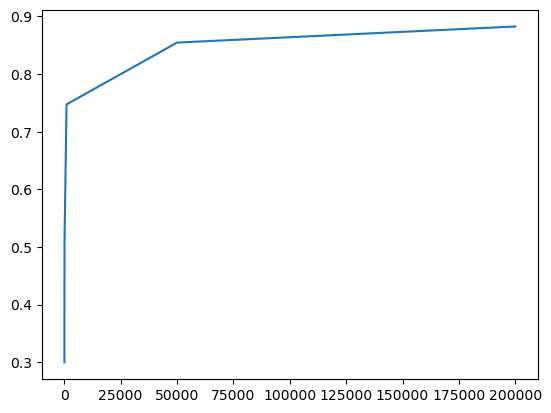

In [5]:
lists = sorted(scores_test.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()